# Model performance comparison

### Splitting data into training and test sets

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes_preprocessed.csv")

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 506
Test set size: 217


## Decision tree

Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy: 0.7649769585253456
Precision: 0.6338028169014085
Recall: 0.6428571428571429
Confusion Matrix: 
[[121  26]
 [ 25  45]]


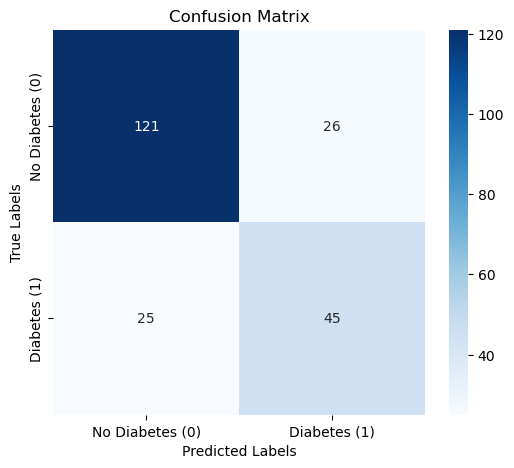

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

decision_tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix: \n{conf_matrix}')

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['No Diabetes (0)', 'Diabetes (1)'], yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


The results of the model show that this approach has not provided sufficiently accurate results for real-world deployment, particularly in predicting diabetes. The biggest concern is the number of False Negative cases, 25 instances that were predicted not to develop diabetes while they actually have the disease. This issue directly affects the recall metric, which did not provide satisfactory results. Possible reasons for these outcomes could be related to the limited number of variables used in the model, and we would recommend introducing additional features that may contribute to more accurate predictions. Before drawing a final conclusion, we plan to test the Gradient Boosting algorithm to assess whether the issue lies within the dataset itself or whether other algorithms may prove to be better predictors for this problem.

## Gradient boosting

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7603686635944701
Precision: 0.6551724137931034
Recall: 0.5428571428571428
Confusion Matrix: 
[[127  20]
 [ 32  38]]


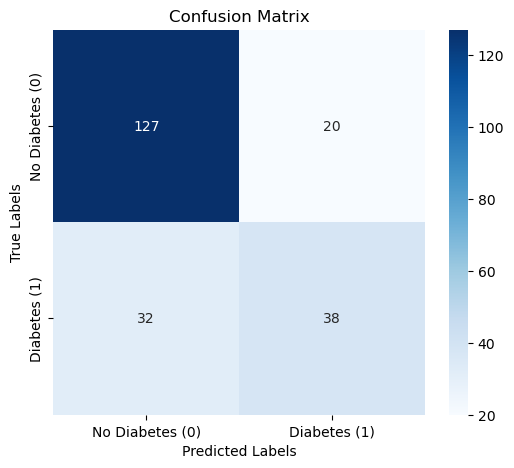

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [5, 8, 10, 20, 50], 
    'learning_rate': [0.01, 0.2 ,0.05, 0.1], 
    'max_depth': [2, 3, 4, 5, 10, 20],
    'min_samples_split': [2, 5, 7]
}

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_gbc = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

y_pred = best_gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix: \n{conf_matrix}')

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['No Diabetes (0)', 'Diabetes (1)'], yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Final comment

The results obtained using the Gradient Boosting algorithm are similar to those of the previous model, with slightly lower overall performance. In particular, recall has decreased compared to the decision tree model, leading to a higher number of false negatives. As previously assumed, a potential issue could be the limited number of predictor variables used for classification. Possible improvements include incorporating additional features, applying data normalization and standardization, and optimizing hyperparameter selection to mitigate the risk of overfitting.